Machine Model To Predict Machine learning to predict customers who are likely to default or not  

Importing Data and Relevant Libraries, Dependencies

In [157]:
import numpy as np
import pandas as pd

In [158]:
data = pd.read_csv('Train.csv')
data2 = pd.read_csv('Test.csv')
submissions = pd.read_csv('SampleSubmission.csv')

##Carry out basic EDA

In [125]:
data.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


In [126]:
data2.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN
3,Apcnt_1000076,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,...,NaN,0.916663,2.02,0.464224,NaN,NaN,charge,90.163742,0.788809,0.104029
4,Apcnt_1000080,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,...,NaN,0.234047,23.23,0.726688,0.0,0.0,lending,1303.587148,1.637733,0.163124


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Applicant_ID    56000 non-null  object 
 1   form_field1     53471 non-null  float64
 2   form_field2     52156 non-null  float64
 3   form_field3     55645 non-null  float64
 4   form_field4     55645 non-null  float64
 5   form_field5     55645 non-null  float64
 6   form_field6     42640 non-null  float64
 7   form_field7     50837 non-null  float64
 8   form_field8     42640 non-null  float64
 9   form_field9     47992 non-null  float64
 10  form_field10    55645 non-null  float64
 11  form_field11    24579 non-null  float64
 12  form_field12    46105 non-null  float64
 13  form_field13    50111 non-null  float64
 14  form_field14    56000 non-null  int64  
 15  form_field15    33525 non-null  float64
 16  form_field16    42964 non-null  float64
 17  form_field17    44849 non-null 

In [128]:
print ("The train data has",data.shape)
print ("The test data has",data2.shape)

The train data has (56000, 52)
The test data has (24000, 51)


In [129]:
nans = data.shape[0] - data.dropna().shape[0]
print ("%d rows have missing values in the train data" %nans)

nand = data2.shape[0] - data2.dropna().shape[0]
print ("%d rows have missing values in the test data" %nand)


55805 rows have missing values in the train data
23919 rows have missing values in the test data


In [130]:
data.isnull().sum()

Applicant_ID          0
form_field1        2529
form_field2        3844
form_field3         355
form_field4         355
form_field5         355
form_field6       13360
form_field7        5163
form_field8       13360
form_field9        8008
form_field10        355
form_field11      31421
form_field12       9895
form_field13       5889
form_field14          0
form_field15      22475
form_field16      13036
form_field17      11151
form_field18      10402
form_field19          4
form_field20        355
form_field21      15854
form_field22      20400
form_field23      28123
form_field24      13297
form_field25       5450
form_field26       7438
form_field27       9299
form_field28        355
form_field29        355
form_field30      25509
form_field31      39408
form_field32       5450
form_field33       1256
form_field34        355
form_field35      23148
form_field36       1995
form_field37       5450
form_field38        355
form_field39       4211
form_field40      43729
form_field41    

##Theres alot of Missing Values, to be filled

fill in Null Values with -999, to indicate an outlier

In [131]:
TrainData = data.fillna(-999)
TestData = data2.fillna(-999)

visualizing the data

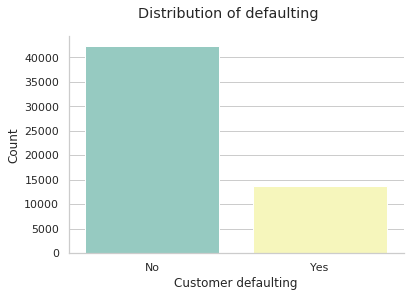

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import suptitle
from seaborn import despine


sns.set(style="whitegrid")

ax=sns.countplot(x='default_status',palette="Set3", data=TrainData)
ax.set_xticklabels(["No","Yes"])
ax.set_ylabel("Count")
ax.set_xlabel("Customer defaulting")
suptitle("Distribution of defaulting ")
despine()

Encoding categorical data to numerical

In [133]:
from sklearn import preprocessing

for x in data.columns:
    if TrainData[x].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(TrainData[x].values))
        TrainData[x] = lbl.transform(list(TrainData[x].values))
        
        
for x in data2.columns:
    if TestData[x].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(TestData[x].values))
        TestData[x] = lbl.transform(list(TestData[x].values))   
                

In [134]:
TrainData = TrainData.drop(["Applicant_ID", "default_status"], axis =1)

TestData = TestData.drop(["Applicant_ID"], axis = 1)

In [135]:
TrainData.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,...,-999.0,0.392854,2.02,0.711632,0.0,0.0,0,-999.000000,1.129518,0.044335
1,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,...,-999.0,0.314281,8.08,0.183584,-999.0,0.0,0,349.805730,1.620483,0.322436
2,3276.0,0.53845,3.1510,0.0,6.282,-999.0,956940.0,-999.0,192944.0,1079864.0,...,-999.0,0.162965,18.18,0.791136,0.0,0.0,0,-999.000000,1.513370,0.011640
3,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,...,-999.0,0.488884,2.02,0.685168,-999.0,0.0,0,89.940100,0.664452,0.082729
4,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,...,-999.0,0.275000,12.12,0.438168,0.0,0.0,0,97.887502,1.427891,0.045630


In [136]:
TestData.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,0.0,...,-999.0000,0.825000,1.01,0.800000,-999.0,0.0,0,-999.000000,0.000000,0.011221
1,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,18308285.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,1,-999.000000,0.504974,0.043525
2,-999.0,0.27505,0.0600,0.0000,0.0,-999.0,-999.0,-999.0,-999.0,0.0,...,-999.0000,-999.000000,0.00,-999.000000,-999.0,-999.0,0,-999.000000,0.000000,-999.000000
3,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,493641.0,...,-999.0000,0.916663,2.02,0.464224,-999.0,-999.0,0,90.163742,0.788809,0.104029
4,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,5752921.0,...,-999.0000,0.234047,23.23,0.726688,0.0,0.0,1,1303.587148,1.637733,0.163124


scaling the Data and building a model for training 

In [137]:
##Scale DataSet
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(TrainData)
x = pd.DataFrame(x)
TestingData = scaler.fit_transform(TestData)

#building a base model
#i adopted the pipeline to train the model

In [138]:
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.datasets.mldata import fetch_mldata
from sklearn.model_selection import cross_val_score

#X = TrainData
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)
#pipe = Pipeline([("scaler", StandardScaler()), ("clf", LogisticRegression())])
#pipe.fit(X_train, y_train)

In [139]:
n_estimators = 400
learning_rate = 1

In [140]:
dt_st = DecisionTreeClassifier(max_depth=1,min_samples_leaf=1)

In [141]:
dt_st.fit(X_train,y_train)
dt_st_err = 1.0 - dt_st.score(X_test,y_test)

In [142]:
dt = DecisionTreeClassifier(max_depth=9, min_samples_leaf=1)

In [143]:
dt.fit(X_train,y_train)
dt_err = 1.0 - dt.score(X_test,y_test)

In [144]:
ada_discrete = AdaBoostClassifier(base_estimator=dt_st, learning_rate=learning_rate, n_estimators=n_estimators, algorithm="SAMME")

In [145]:
ada_discrete.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [146]:
scores = cross_val_score(ada_discrete, X_test, y_test)
print(scores)
means = scores.mean()
print(means)

[0.7952381  0.79732143 0.79910714 0.80297619 0.79702381]
0.7983333333333333


In [106]:
preiction = ada_discrete.predict(X_test)

In [119]:
#from sklearn.metrics import roc_auc_score

#score = roc_auc_score(y_test, prediction)
#print("AUC Score on validation set: ",score)

In [120]:
#pipe.predict(X_test)

In [121]:
#prediction = pipe.predict(X_test)

In [122]:
#from sklearn.metrics import roc_auc_score

#score = roc_auc_score(y_test, prediction)
#print("AUC Score on validation set: ",score)

##Predictiing on the Test Data (data2) set and creation of a submittion file

In [147]:
ada_discrete.fit(x,y)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [148]:
#pipe.fit(x,y)

In [149]:
pred = ada_discrete.predict(TestingData)

In [150]:
pred

array([0, 0, 0, ..., 1, 1, 0])

In [159]:
submissions.head()

,Applicant_ID,default_status
0,Apcnt_1000032,1
1,Apcnt_1000048,1
2,Apcnt_1000052,1
3,Apcnt_1000076,1
4,Apcnt_1000080,1


In [160]:
submission_file = submissions.copy

In [163]:
#submission_file.default_status = pred

In [162]:
pd.DataFrame({"Applicant_ID": data2["Applicant_ID"], "default_status": pred}).to_csv("starter-submission_2.csv", index = False)

##virtualization of the prediction and way forward

In [ ]:
sna.countplot(submission.default_status )

i believe with more information about the whole data would surellyy be helpful especially for feature engineering and in order to build a better learning model, and also other techniques such as tryingn other training classifiers and also twiking the hyperparametrs might goa long way in a creating a more effective and accuratte training model